<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Input-Output Operations

In [1]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = '/Users/yves/Documents/Temp/data/'  # choose a path to your liking

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000000)]
  # generation of normally distributed randoms

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')
  # open file for writing
  # Note: existing file might be overwritten

In [7]:
%time pickle.dump(a, pkl_file)

CPU times: user 31.7 ms, sys: 14.8 ms, total: 46.5 ms
Wall time: 47 ms


In [8]:
pkl_file

<_io.BufferedWriter name='/Users/yves/Documents/Temp/data/data.pkl'>

In [9]:
pkl_file.close()

In [10]:
ll $path*

-rw-r--r--  1 yves  staff  9002006 Nov 18 11:18 /Users/yves/Documents/Temp/data/data.pkl
-rw-r--r--  1 yves  staff     1024 Nov 18 11:18 /Users/yves/Documents/Temp/data/tab.h5


In [11]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [12]:
%time b = pickle.load(pkl_file)

CPU times: user 41.7 ms, sys: 21.8 ms, total: 63.5 ms
Wall time: 65.3 ms


In [13]:
b[:5]

[0.41705297184667334,
 1.9019740570376804,
 1.168316084750203,
 3.076797110090128,
 1.53114300797927]

In [14]:
a[:5]

[0.41705297184667334,
 1.9019740570376804,
 1.168316084750203,
 3.076797110090128,
 1.53114300797927]

In [15]:
np.allclose(np.array(a), np.array(b))

True

In [16]:
np.sum(np.array(a) - np.array(b))

0.0

In [17]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing

In [18]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 33 ms, sys: 11.4 ms, total: 44.4 ms
Wall time: 43.9 ms


In [19]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

CPU times: user 33.6 ms, sys: 11.1 ms, total: 44.7 ms
Wall time: 44.9 ms


In [20]:
pkl_file.close()

In [21]:
ll $path*

-rw-r--r--  1 yves  staff  16000322 Nov 18 11:18 /Users/yves/Documents/Temp/data/data.pkl
-rw-r--r--  1 yves  staff      1024 Nov 18 11:18 /Users/yves/Documents/Temp/data/tab.h5


In [22]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [23]:
x = pickle.load(pkl_file)
x

array([ 0.41705297,  1.90197406,  1.16831608, ...,  1.19136073,
       -2.3441016 ,  1.79922934])

In [24]:
y = pickle.load(pkl_file)
y

array([ 0.17393318,  3.61750531,  1.36496247, ...,  1.41934039,
        5.49481231,  3.23722622])

In [25]:
pkl_file.close()


In [26]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [27]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 0.41705297  1.90197406  1.16831608  3.07679711]
y [ 0.17393318  3.61750531  1.36496247  9.46668046]


In [28]:
!rm -f $path*

### Reading and Writing Text Files

In [29]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [30]:
a.round(4)

array([[-1.3943,  1.0583, -0.0957,  0.2299,  1.1435],
       [-0.2705,  1.187 ,  0.3749, -0.1222,  0.4414],
       [-1.2177,  1.9297,  0.5987, -1.38  ,  0.3748],
       ..., 
       [ 0.6643,  0.9493, -0.9072, -0.2658, -1.8787],
       [ 0.4846,  1.377 ,  0.2034, -1.2119,  0.3271],
       [-0.1203,  0.3872,  0.0779,  0.7924, -0.5599]])

In [31]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects

In [32]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [33]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [34]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [35]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [36]:
ll $path*

-rw-r--r--  1 yves  staff  337496 Nov 18 11:18 /Users/yves/Documents/Temp/data/data.csv


In [37]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [38]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-1.394315,1.058289,-0.095678,0.229927,1.143520
2014-01-01 01:00:00,-0.270480,1.187046,0.374870,-0.122235,0.441432
2014-01-01 02:00:00,-1.217690,1.929734,0.598703,-1.379972,0.374803
2014-01-01 03:00:00,1.150287,0.801783,-0.816626,0.079250,2.028039


In [39]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-1.394315,1.058289,-0.095678,0.229927,1.143520
2014-01-01 01:00:00,-0.270480,1.187046,0.374870,-0.122235,0.441432
2014-01-01 02:00:00,-1.217690,1.929734,0.598703,-1.379972,0.374803
2014-01-01 03:00:00,1.150287,0.801783,-0.816626,0.079250,2.028039


In [40]:
csv_file.close()
!rm -f $path*

### SQL Databases

In [41]:
import sqlite3 as sq3

In [42]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [43]:
con = sq3.connect(path + 'numbs.db')

In [44]:
con.execute(query)

In [45]:
con.commit()

In [46]:
import datetime as dt

In [47]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [48]:
data = np.random.standard_normal((10000, 2)).round(5)

In [49]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [50]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2017-11-18 11:18:51.443295', 0.12, 7.3),
 ('2017-11-18 11:18:51.466328', 0.9791, -0.01914),
 ('2017-11-18 11:18:51.466580', -0.88736, 0.19104),
 ('2017-11-18 11:18:51.466700', 0.27877, 1.2128),
 ('2017-11-18 11:18:51.466739', 0.19375, -0.47101),
 ('2017-11-18 11:18:51.466760', -0.15771, 0.48576),
 ('2017-11-18 11:18:51.466778', 0.32436, -0.35469),
 ('2017-11-18 11:18:51.466799', -0.40715, 0.30432),
 ('2017-11-18 11:18:51.466817', 0.27333, 1.36148),
 ('2017-11-18 11:18:51.466837', -0.86928, 0.60982)]

In [51]:
pointer = con.execute('SELECT * FROM numbs')

In [52]:
for i in range(3):
    print(pointer.fetchone())

('2017-11-18 11:18:51.443295', 0.12, 7.3)
('2017-11-18 11:18:51.466328', 0.9791, -0.01914)
('2017-11-18 11:18:51.466580', -0.88736, 0.19104)


In [53]:
con.close()
!rm -f $path*

### Writing and Reading Numpy Arrays

In [54]:
import numpy as np

In [55]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [56]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [57]:
data['Date'] = dtimes

In [58]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [59]:
%time np.save(path + 'array', data)  # suffix .npy is added

CPU times: user 3.8 ms, sys: 90.2 ms, total: 94 ms
Wall time: 100 ms


In [60]:
ll $path*

-rw-r--r--  1 yves  staff  58901888 Nov 18 11:18 /Users/yves/Documents/Temp/data/array.npy


In [61]:
%time np.load(path + 'array.npy')

CPU times: user 1.98 ms, sys: 48.7 ms, total: 50.6 ms
Wall time: 48.6 ms


array([('2015-01-01T10:00',  0.21562999,  0.15317   ),
       ('2015-01-01T10:01', -1.05716002,  0.03817   ),
       ('2015-01-01T10:02',  0.47112   ,  0.35991001), ...,
       ('2021-12-31T21:57',  1.28573   , -0.73549998),
       ('2021-12-31T21:58', -0.29818001,  3.01900005),
       ('2021-12-31T21:59',  0.10222   , -0.32659999)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [62]:
data = np.random.standard_normal((10000, 6000))

In [63]:
%time np.save(path + 'array', data) 

CPU times: user 22.4 ms, sys: 801 ms, total: 823 ms
Wall time: 878 ms


In [64]:
ll $path*

-rw-r--r--  1 yves  staff  480000080 Nov 18 11:18 /Users/yves/Documents/Temp/data/array.npy


In [65]:
%time np.load(path + 'array.npy')

CPU times: user 1.93 ms, sys: 402 ms, total: 404 ms
Wall time: 401 ms


array([[ 0.03967231, -0.44617488,  1.84494039, ...,  1.22029866,
         0.12221619,  0.44151821],
       [-1.07434497,  1.56631898,  0.08090161, ...,  0.69134028,
        -0.23983819, -1.05064435],
       [ 0.45244652, -1.06725802, -1.54753357, ..., -0.58159932,
        -3.1417449 ,  0.72427687],
       ..., 
       [ 0.22671119,  0.84848976,  0.68443249, ...,  0.60887334,
        -0.21399232,  0.98265078],
       [ 1.29398576,  0.8073082 ,  1.12266816, ...,  0.27215982,
        -1.70811003, -1.17700969],
       [-1.34442515, -0.72330326, -0.19741916, ..., -0.2253629 ,
         0.50730268,  1.44775108]])

In [66]:
data = 0.0
!rm -f $path*

## I/O with pandas

In [67]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5)
        # sample data set

In [68]:
filename = path + 'numbs'

### SQL Database

In [69]:
import sqlite3 as sq3

In [70]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [71]:
con = sq3.Connection(filename + '.db')

In [72]:
con.execute(query)

In [73]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 8.19 s, sys: 285 ms, total: 8.48 s
Wall time: 9.2 s


In [74]:
ll $path*

-rw-r--r--  1 yves  staff  52633600 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.db


In [75]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(0.81395, -1.14852, 1.25441, -0.20772, -0.76249), (-1.75186, -0.51531, 0.7186, 0.45964, -0.61147)]
CPU times: user 1.74 s, sys: 160 ms, total: 1.9 s
Wall time: 1.92 s


In [76]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 666 ms, sys: 65 ms, total: 731 ms
Wall time: 738 ms


(-4.5, 0.5)

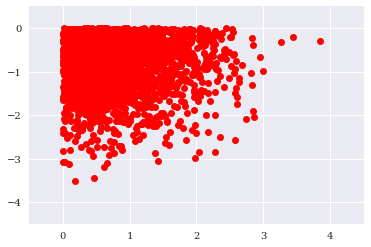

In [77]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [78]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

CPU times: user 1.94 s, sys: 203 ms, total: 2.15 s
Wall time: 2.16 s


In [79]:
data.head()

,No1,No2,No3,No4,No5
0,0.81395,-1.14852,1.25441,-0.20772,-0.76249
1,-1.75186,-0.51531,0.71860,0.45964,-0.61147
2,0.36132,1.14465,-1.54464,0.35145,-1.21890
3,-0.53355,-1.02722,-0.41101,1.62077,-0.34930
4,0.71410,0.62260,-0.55907,0.02055,-1.35438


In [80]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: user 19.8 ms, sys: 11.5 ms, total: 31.4 ms
Wall time: 30.5 ms


,No1,No2,No3,No4,No5
0,0.81395,-1.14852,1.25441,-0.20772,-0.76249
15,0.67082,-0.82088,-0.49540,0.90000,-0.26839
18,0.44444,-1.53277,0.24012,1.14207,-1.31815
20,0.60405,-1.65918,-1.18458,-0.62727,0.52210
23,0.40057,-1.35948,0.57998,-0.20918,0.59911


In [81]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

CPU times: user 26.6 ms, sys: 13 ms, total: 39.6 ms
Wall time: 36.9 ms


(-4.8328180000000005,
 5.1025580000000001,
 -5.0094565000000006,
 5.1164065000000001)

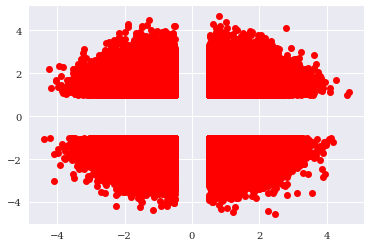

In [82]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

In [83]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [84]:
%time h5s['data'] = data

CPU times: user 43 ms, sys: 67.4 ms, total: 110 ms
Wall time: 111 ms


In [85]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/yves/Documents/Temp/data/numbs.h5s

In [86]:
h5s.close()

In [87]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

CPU times: user 8.49 ms, sys: 27.1 ms, total: 35.6 ms
Wall time: 34.2 ms


In [88]:
np.allclose(np.array(temp), np.array(data))

True

In [89]:
temp = 0.0

In [90]:
ll $path*

-rw-r--r--  1 yves  staff  52633600 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.db
-rw-r--r--  1 yves  staff  48007192 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.h5s


### Data as CSV File

In [91]:
%time data.to_csv(filename + '.csv')

CPU times: user 7.11 s, sys: 334 ms, total: 7.44 s
Wall time: 7.7 s


In [92]:
ll $path

total 291944
-rw-r--r--  1 yves  staff  48832354 Nov 18 11:19 numbs.csv
-rw-r--r--  1 yves  staff  52633600 Nov 18 11:19 numbs.db
-rw-r--r--  1 yves  staff  48007192 Nov 18 11:19 numbs.h5s


CPU times: user 2.03 s, sys: 222 ms, total: 2.26 s
Wall time: 2.64 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107cf9198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x101eb4710>]], dtype=object)

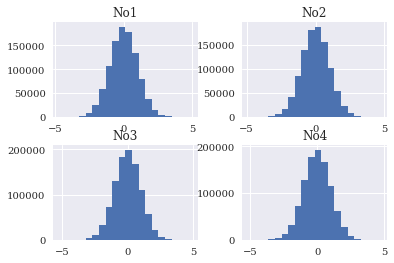

In [93]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20);
# tag: data_hist_3
# title: Histogram of 4 data set

### Data as Excel File

In [94]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 26.4 s, sys: 613 ms, total: 27.1 s
Wall time: 27.7 s


CPU times: user 5.78 s, sys: 90.6 ms, total: 5.87 s
Wall time: 5.9 s


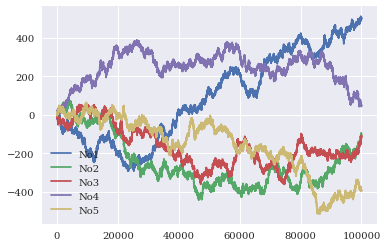

In [95]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60

In [96]:
ll $path*

-rw-r--r--  1 yves  staff  48832354 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.csv
-rw-r--r--  1 yves  staff  52633600 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.db
-rw-r--r--  1 yves  staff  48007192 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.h5s
-rw-r--r--  1 yves  staff   4370554 Nov 18 11:19 /Users/yves/Documents/Temp/data/numbs.xlsx


In [97]:
rm -f $path*

## Fast I/O with PyTables

In [98]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Working with Tables

In [99]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w') 

In [100]:
rows = 2000000

In [101]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }

In [102]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [103]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [104]:
pointer = tab.row

In [105]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [106]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()

CPU times: user 7.61 s, sys: 90.9 ms, total: 7.7 s
Wall time: 7.73 s


In [107]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [108]:
ll $path*

-rw-r--r--  1 yves  staff  100156248 Nov 18 11:20 /Users/yves/Documents/Temp/data/tab.h5


In [109]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [110]:
sarray

array([(b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       ..., (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       (b'', 0, 0,  0.,  0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [111]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: user 83.6 ms, sys: 43.1 ms, total: 127 ms
Wall time: 126 ms


In [112]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

CPU times: user 31.9 ms, sys: 53.7 ms, total: 85.6 ms
Wall time: 86.3 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [113]:
h5

File(filename=/Users/yves/Documents/Temp/data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [114]:
h5.remove_node('/', 'ints_floats_from_array')

In [115]:
tab[:3]

array([(b'2017-11-18 11:19:58.907369',  364, 9255, -0.8055 ,  0.1939 ),
       (b'2017-11-18 11:19:58.907491', 3148, 7723,  0.02658,  0.13049),
       (b'2017-11-18 11:19:58.907536', 3818,  883,  1.7987 , -0.1117 )],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [116]:
tab[:4]['No4']

array([ 0.1939 ,  0.13049, -0.1117 , -0.81207])

In [117]:
%time np.sum(tab[:]['No3'])

CPU times: user 52.9 ms, sys: 81.8 ms, total: 135 ms
Wall time: 139 ms


-704.67624000000001

In [118]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 47.5 ms, sys: 62.7 ms, total: 110 ms
Wall time: 115 ms


133331453.10578465

2000000
CPU times: user 228 ms, sys: 130 ms, total: 359 ms
Wall time: 399 ms


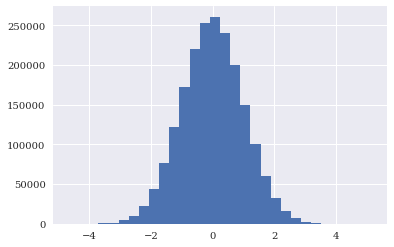

In [119]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))
# tag: data_hist
# title: Histogram of data
# size: 60

In [120]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 392 ms, sys: 92.2 ms, total: 484 ms
Wall time: 469 ms


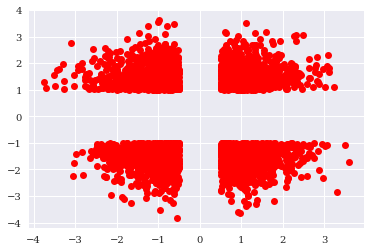

In [121]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)
# tag: scatter_data
# title: Scatter plot of query result
# size: 70

In [122]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              5.167
Ave             -0.000
Min             -4.692
Std              1.000
CPU times: user 52.1 ms, sys: 50.7 ms, total: 103 ms
Wall time: 99.3 ms


In [123]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

(9888, 4583)
(85, 5058)
(9963, 4937)
(9821, 5035)
CPU times: user 92.3 ms, sys: 41.1 ms, total: 133 ms
Wall time: 102 ms


In [124]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print(res)

(1234, 9855)
(1234, 9854)
(1234, 9960)
(1234, 9910)
(1234, 9980)
CPU times: user 56.8 ms, sys: 44.2 ms, total: 101 ms
Wall time: 86.7 ms


### Working with Compressed Tables

In [125]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w') 

In [126]:
filters = tb.Filters(complevel=4, complib='blosc')

In [127]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [128]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 364 ms, sys: 70 ms, total: 434 ms
Wall time: 393 ms


In [129]:
%time arr_non = tab.read()

CPU times: user 36.9 ms, sys: 59.9 ms, total: 96.8 ms
Wall time: 99.5 ms


In [130]:
%time arr_com = tabc.read()

CPU times: user 42.2 ms, sys: 70.6 ms, total: 113 ms
Wall time: 132 ms


In [131]:
ll $path*

-rw-r--r--  1 yves  staff  200312336 Nov 18 11:20 /Users/yves/Documents/Temp/data/tab.h5
-rw-r--r--  1 yves  staff  100030837 Nov 18 11:20 /Users/yves/Documents/Temp/data/tab.h5c


In [132]:
h5c.close()

### Working with Arrays

In [133]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: user 2.07 ms, sys: 29.4 ms, total: 31.4 ms
Wall time: 31.4 ms


In [134]:
h5

File(filename=/Users/yves/Documents/Temp/data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [135]:
ll $path*

-rw-r--r--  1 yves  staff  262344490 Nov 18 11:20 /Users/yves/Documents/Temp/data/tab.h5
-rw-r--r--  1 yves  staff  100030837 Nov 18 11:20 /Users/yves/Documents/Temp/data/tab.h5c


In [136]:
h5.close()

In [137]:
!rm -f $path*

### Out-of-Memory Computations

In [138]:
filename = path + 'array.h5'
h5 = tb.open_file(filename, 'w') 

In [139]:
n = 100
ear = h5.create_earray(h5.root, 'ear',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [140]:
%%time
rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 58.9 ms, sys: 46.3 ms, total: 105 ms
Wall time: 110 ms


In [141]:
ear

/ear (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [142]:
ear.size_on_disk

60004800

In [143]:
out = h5.create_earray(h5.root, 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [144]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
  # the numerical expression as a string object
expr.set_output(out, append_mode=True)
  # target to store results is disk-based array

In [145]:
%time expr.eval()
  # evaluation of the numerical expression
  # and storage of results in disk-based array

CPU times: user 126 ms, sys: 60.3 ms, total: 186 ms
Wall time: 143 ms


/out (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [146]:
out[0, :10]

array([-1.07467344, -1.37566913,  0.58400115, -1.24829058,  3.21885945,
        3.91948805,  4.24386819,  2.68949685,  4.25101978,  3.45909167])

In [147]:
%time imarray = ear.read()
  # read whole array into memory

CPU times: user 29.9 ms, sys: 44.2 ms, total: 74.2 ms
Wall time: 83.9 ms


In [148]:
import numexpr as ne
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [149]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0, :10]

CPU times: user 94 ms, sys: 48.1 ms, total: 142 ms
Wall time: 40.1 ms


array([-1.07467344, -1.37566913,  0.58400115, -1.24829058,  3.21885945,
        3.91948805,  4.24386819,  2.68949685,  4.25101978,  3.45909167])

In [150]:
h5.close()

In [151]:
!rm -f $path*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>